# Projet 10: Développez une preuve de concept

Air Paradis veut un prototype d’un produit IA permettant de prédire le sentiment associé à un tweet.
Il n’y pas de données clients chez Air Paradis donc nous avons réalisé cette étude en utilisant des données Open Source. Il s'agit du jeu de données Sentiment140. Il contient 1 600 000 tweets extraits à l'aide de l'API Twitter. Les tweets ont été annotés (0 = négatif, 4 = positif) et peuvent être utilisés pour détecter le sentiment.



#  Analyse exploratoire des données et pré-traitement des textes

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from wordcloud import WordCloud,STOPWORDS
import sys
sys.path.append('../src')  # Add the src folder to the module search path
from src.utils import Utils
from nltk.tokenize import sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
%matplotlib inline

## Analyse exploratoire des données

In [16]:
all_data = pd.read_csv('D:/openclassroom/projet7/input/training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1', names=["target", "id", "date", "flag", "user", "text"])

In [17]:
all_data.head()

target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....

In [18]:
all_data.shape

(1600000, 6)

In [19]:
# Drop useless columns
all_data.drop(columns=["id", "date", "flag", "user"], inplace=True)


In [20]:
all_data.head()

target                                               text
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1       0  is upset that he can't update his Facebook by ...
2       0  @Kenichan I dived many times for the ball. Man...
3       0    my whole body feels itchy and like its on fire 
4       0  @nationwideclass no, it's not behaving at all....

In [21]:
labels = all_data['target'].unique()
print(labels)

[0 4]


In [22]:
# Replace target values with labels
all_data.target = all_data.target.map(
    {
        0: "NEGATIVE",
        4: "POSITIVE",
    }
)

['NEGATIVE' 'POSITIVE']


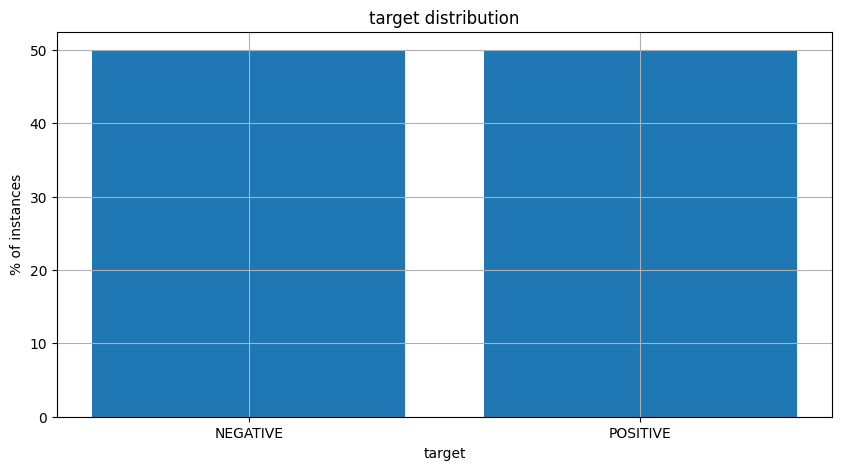

In [23]:
# the histogram of the data
labels = all_data['target'].unique()
print(labels)
post_total = len(all_data)
df1 = all_data.groupby(['target']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('target')
plt.title('target distribution')
plt.grid(True)
plt.show()

In [14]:
neg_df = all_data[all_data.target=="NEGATIVE"].copy()
pos_df = all_data[all_data.target=="POSITIVE"].copy()

In [15]:
tokenizer = RegexpTokenizer(r'\w+')

neg_text = '. '.join(neg_df['text'])
pos_text = '. '.join(pos_df['text'])

neg_words = tokenizer.tokenize(neg_text)
pos_words = tokenizer.tokenize(pos_text)

neg_sentences = neg_text.replace(",", ".").replace("?", ".").split(".")
pos_sentences = pos_text.replace(",", ".").replace("?", ".").split(".")

neg_sent_lenghs =[len(tokenizer.tokenize(sentence)) for sentence in neg_sentences]
pos_sent_lenghs =[len(tokenizer.tokenize(sentence)) for sentence in pos_sentences]

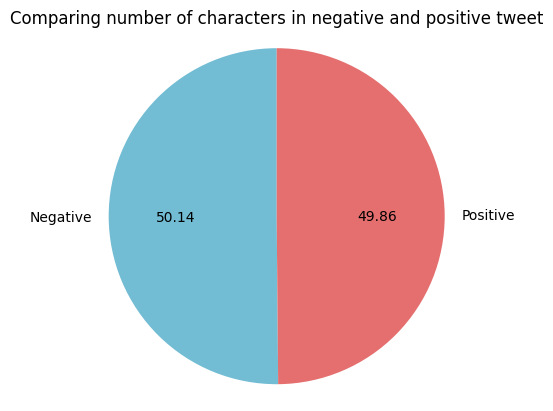

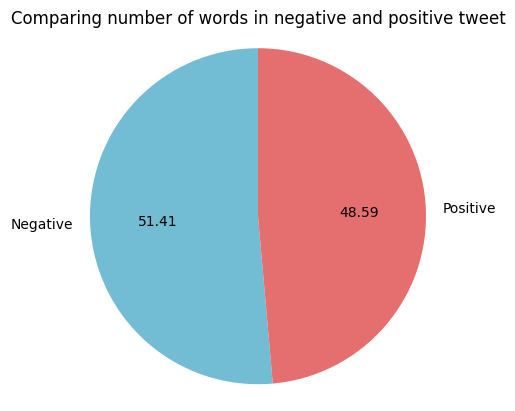

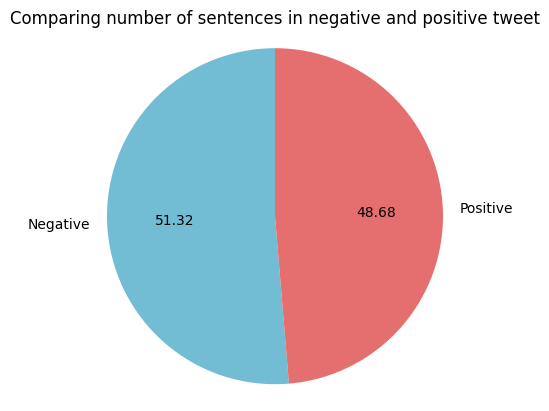

In [16]:
# comparing total length of characters utterred
tot_chars = []
tot_chars.append(len(neg_text))
tot_chars.append(len(pos_text))
labels = 'Negative','Positive'
colors = ["#72bcd4", '#e56f6f']
ax1=plt.pie(tot_chars, colors=colors, shadow=False, startangle=90, labels=labels, autopct='%.2f')
plt.axis('equal')
plt.title("Comparing number of characters in negative and positive tweet")
plt.show()

tot_words = [len(neg_words), len(pos_words)]
ax2=plt.pie(tot_words, colors=colors, shadow=False, startangle=90, labels=labels, autopct='%.2f')
plt.title("Comparing number of words in negative and positive tweet")
plt.axis('equal')
plt.show()

tot_sent = [len(neg_sentences), len(pos_sentences)]
ax2=plt.pie(tot_sent, colors=colors, shadow=False, startangle=90, labels=labels, autopct='%.2f')
plt.title("Comparing number of sentences in negative and positive tweet")
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Comparing number of words per sentence distribution in negative and positive tweets')

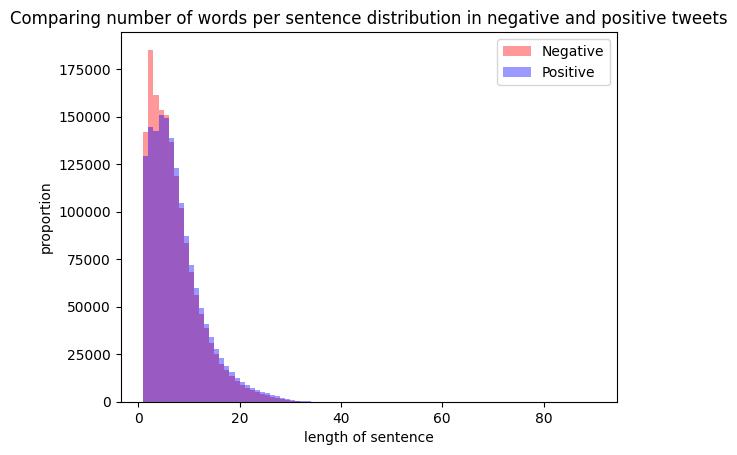

In [17]:
neg_sent_len = [i for i in neg_sent_lenghs if i!=0]
pos_sent_len = [i for i in pos_sent_lenghs if i!=0]

plt.hist(pos_sent_len, bins=range(min(pos_sent_len), max(pos_sent_len) + 1, 1), 
              alpha=0.4, color="red")
plt.hist(neg_sent_len, bins=range(min(neg_sent_len), max(neg_sent_len) + 1, 1),
              alpha=0.4, color="blue")
labels = ['Negative',"Positive"]
plt.legend(labels)
plt.xlabel("length of sentence")
plt.ylabel("proportion")
plt.title("Comparing number of words per sentence distribution in negative and positive tweets")

**Data wordcloud**

In [20]:
plt.figure(figsize=(15,15))

all_text=" ".join(all_data['text'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="Spectral").generate(all_text)
# display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Negative comments wordcloud**

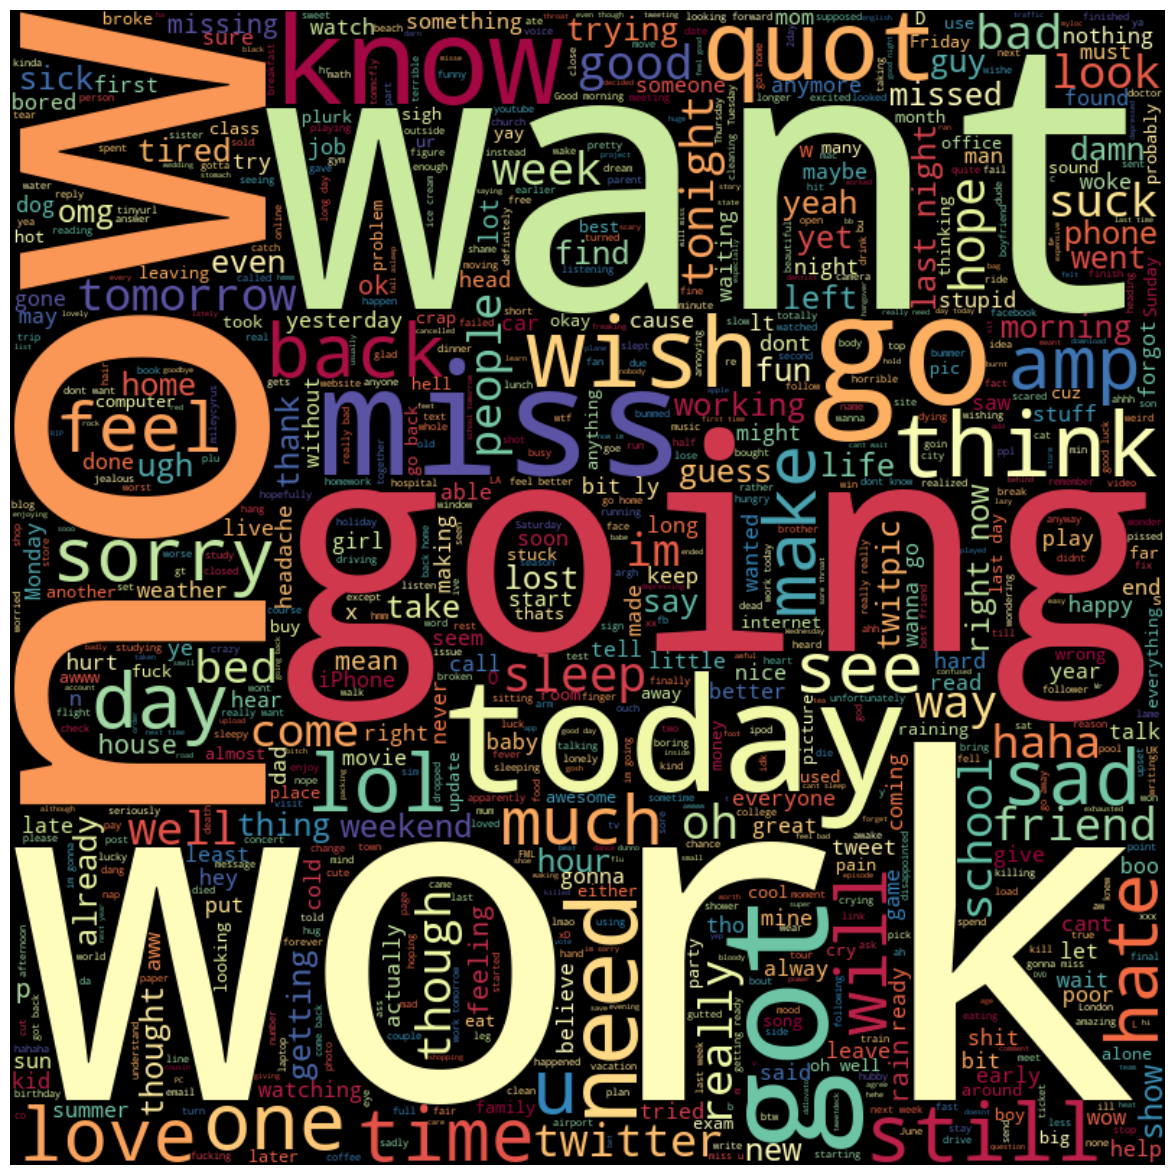

In [25]:
plt.figure(figsize=(15,15))
ham_data_wordcloud=all_data[all_data["target"]=='NEGATIVE']
ham_text=" ".join(ham_data_wordcloud['text'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="Spectral").generate(ham_text)
# display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Positive comments wordcloud**

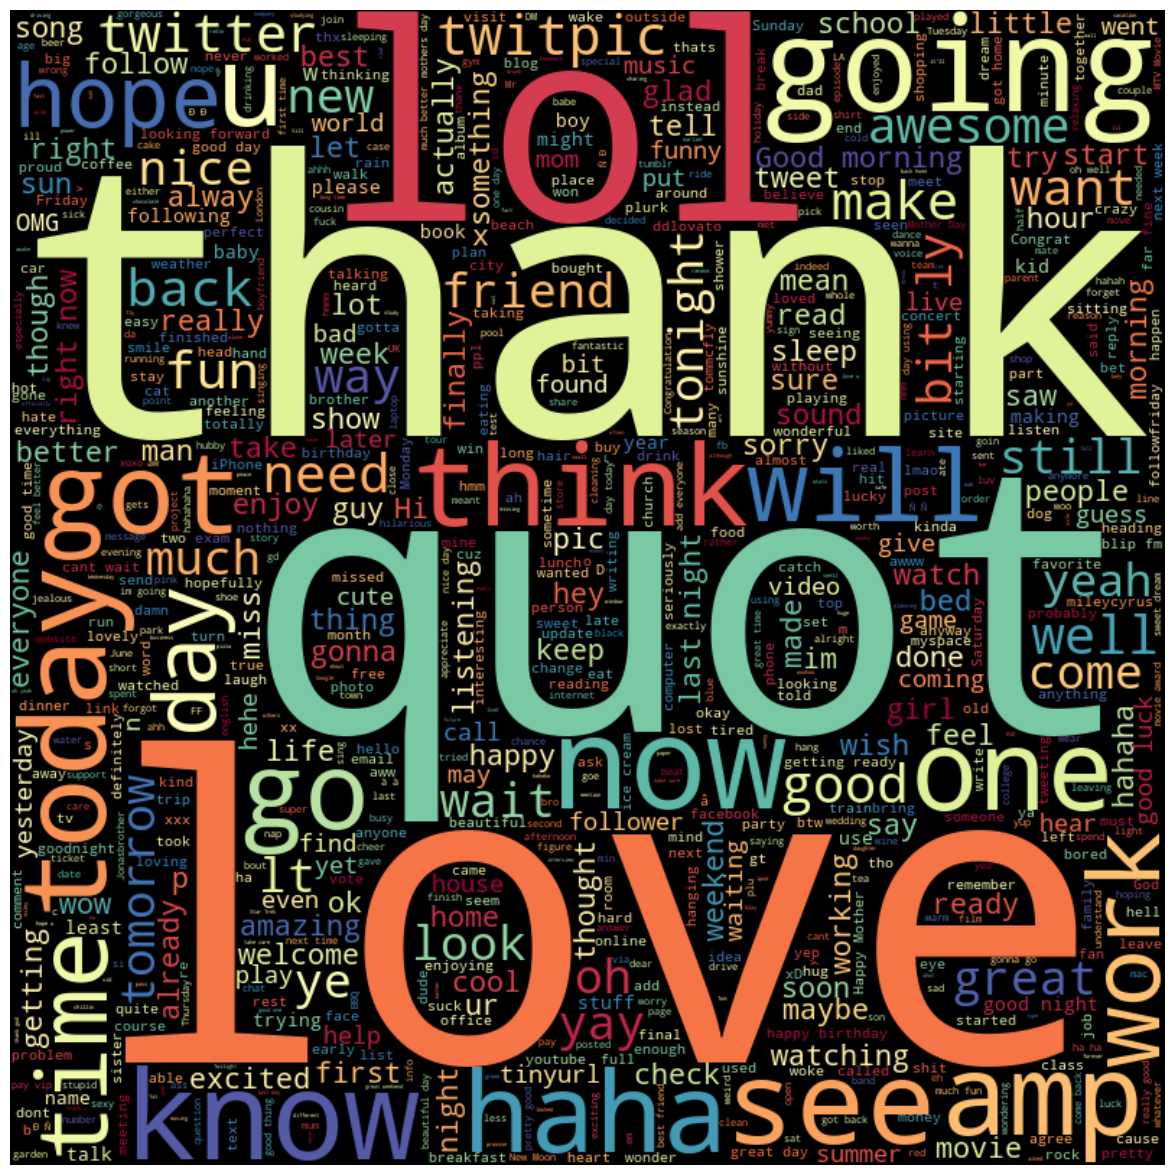

In [26]:
plt.figure(figsize=(15,15))
ham_data_wordcloud=all_data[all_data["target"]=='POSITIVE']
ham_text=" ".join(ham_data_wordcloud['text'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="Spectral").generate(ham_text)
# display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
avg_len=all_data["text"].apply(len)
avg_len=avg_len.mean()
print(f"Average Text Length is : {avg_len:.2f}")

Average Text Length is : 74.09


## Prétraitement de texte

In [24]:
texts = Utils.remove_special_characters(all_data.text)
texts

0          switchfoot httptwitpiccom Awww thats a bummer ...
1          is upset that he cant update his Facebook by t...
2          Kenichan I dived many times for the ball Manag...
3            my whole body feels itchy and like its on fire 
4          nationwideclass no its not behaving at all im ...
                                 ...                        
1599995    Just woke up Having no school is the best feel...
1599996    TheWDBcom Very cool to hear old Walt interview...
1599997    Are you ready for your MoJo Makeover Ask me fo...
1599998    Happy Birthday to my boo of alll time Tupac Am...
1599999         happy charitytuesday theNSPCC SparksCharity 
Name: text, Length: 1600000, dtype: object

In [25]:
df_cleaned_docs = all_data.copy()
df_cleaned_docs['clean_text'] = texts
df_cleaned_docs.head()

target                                               text  \
0  NEGATIVE  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  NEGATIVE  is upset that he can't update his Facebook by ...   
2  NEGATIVE  @Kenichan I dived many times for the ball. Man...   
3  NEGATIVE    my whole body feels itchy and like its on fire    
4  NEGATIVE  @nationwideclass no, it's not behaving at all....   

                                          clean_text  
0  switchfoot httptwitpiccom Awww thats a bummer ...  
1  is upset that he cant update his Facebook by t...  
2  Kenichan I dived many times for the ball Manag...  
3    my whole body feels itchy and like its on fire   
4  nationwideclass no its not behaving at all im ...

In [29]:
df_cleaned_docs.to_csv('D:/openclassroom/projet7/input/df_cleaned_docs.csv',index=False)

In [26]:
data_db = df_cleaned_docs.sample(n=5000, random_state=42)

In [27]:
data_db.to_csv('D:/openclassroom/projet7/input/data_db.csv',index=False)